**Problem Statement**

Financial threats are displaying a trend about the credit risk of commercial banks as the incredible improvement in the financial industry has arisen. In this way, one of the biggest threats faces by commercial banks is the risk prediction of credit clients. The goal is to predict the probability of credit default based on credit card owner's characteristics and payment and ransaction history.

**Approach**

Tasks:- Hybrid Technique using Deep Learning and Genetics Algorithm. 
Supervised Learning tasks (Classification Problem)

Environment and Tools.

1. Tensorflow and Keras API.
2. Sklearn.
3. Matplotlib and Seaborn.
4. MLflow
5. PyGad

**Table of Content**
1. Importing Dependencies.
2. Data Understanding.
3. Exploratory Data Analysis.
4. Feature Engineering.
5. Model Building.
6. Model Evaluation and Interpretation

**Loading Dependencies**

In [67]:
import pandas as pd
import numpy as np
from collections import Counter

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from pygad import GA
from pygad.kerasga import KerasGA, model_weights_as_vector, model_weights_as_matrix, predict

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import Callback, EarlyStopping, TensorBoard, ModelCheckpoint
from tensorflow.keras.regularizers import L1L2

import mlflow
from mlflow.tensorflow import autolog
from mlflow import log_metrics

**Data Understanding**

The process of analyzing data is to understand the data and gain useful information so that the derived knowledge can help in decision making.

In [28]:
# loading dataset
df = pd.read_csv('Datasets/customer_transaction.csv')

In [29]:
# returns the first five rows
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
0,1744506,9/30/2018 0:00,4423,7637,12.29,0
1,1744507,9/30/2018 0:00,3680,5369,222.32,1
2,1744508,9/30/2018 0:00,3255,1246,8.79,0
3,1744509,9/30/2018 0:01,1353,8423,33.77,0
4,1744510,9/30/2018 0:02,1231,1382,60.86,0


In [30]:
# return a tuple representing the dimensionality of the datasets
df.shape

(9649, 6)

In [31]:
# Count number of distinct elements in specified axis
df.nunique()

TRANSACTION_ID    9649
TX_DATETIME       1384
CUSTOMER_ID       3705
TERMINAL_ID       6073
TX_AMOUNT         6679
TX_FRAUD             2
dtype: int64

In [32]:
# print a concise summary about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRANSACTION_ID  9649 non-null   int64  
 1   TX_DATETIME     9649 non-null   object 
 2   CUSTOMER_ID     9649 non-null   int64  
 3   TERMINAL_ID     9649 non-null   int64  
 4   TX_AMOUNT       9649 non-null   float64
 5   TX_FRAUD        9649 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 452.4+ KB


In [33]:
# return the sum of Series denoting duplicate rows.
df.duplicated().sum()

0

In [34]:
# return a Series containing counts of default. 
df['TX_FRAUD'].value_counts()

0    9569
1      80
Name: TX_FRAUD, dtype: int64

In [35]:
# return the total sum of missing values in present in the dataset 
df.isnull().sum()

TRANSACTION_ID    0
TX_DATETIME       0
CUSTOMER_ID       0
TERMINAL_ID       0
TX_AMOUNT         0
TX_FRAUD          0
dtype: int64

In [36]:
# generate descriptive statistics of the dataset.
df.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
count,9.649000e+03,9649.000000,9649.000000,9649.000000,9649.000000
mean,1.749330e+06,2488.178982,4992.228003,53.479106,0.008291
std,2.785571e+03,1448.295221,2880.338647,42.517344,0.090681
min,1.744506e+06,0.000000,0.000000,0.000000,0.000000
25%,1.746918e+06,1235.000000,2536.000000,20.540000,0.000000
50%,1.749330e+06,2478.000000,4953.000000,44.180000,0.000000
75%,1.751742e+06,3746.000000,7484.000000,76.660000,0.000000
max,1.754154e+06,4999.000000,9999.000000,699.300000,1.000000


In [37]:
# checking relationship i.e correlation of variable in the dataset
corr = df.corr()
corr

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
TRANSACTION_ID,1.000000,-0.000947,0.007677,-0.025497,-0.005263
CUSTOMER_ID,-0.000947,1.000000,-0.004250,0.011544,0.006833
TERMINAL_ID,0.007677,-0.004250,1.000000,0.011074,0.003869
TX_AMOUNT,-0.025497,0.011544,0.011074,1.000000,0.177885
TX_FRAUD,-0.005263,0.006833,0.003869,0.177885,1.000000


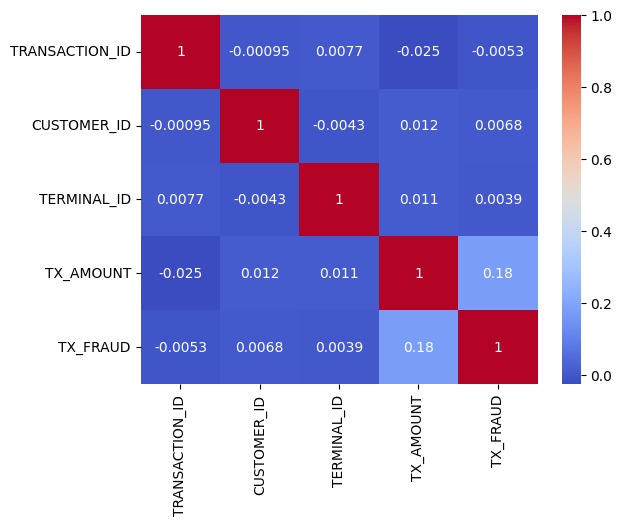

In [38]:
# checking correlation in heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

**Data visualization is the graphical representation of information and data.**

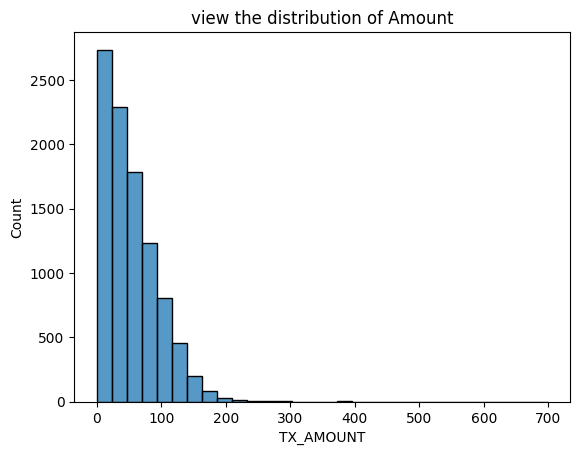

In [39]:
# view the distribution of Age
plt.title('view the distribution of Amount')
sns.histplot(data=df, x='TX_AMOUNT', bins=30)
plt.show()

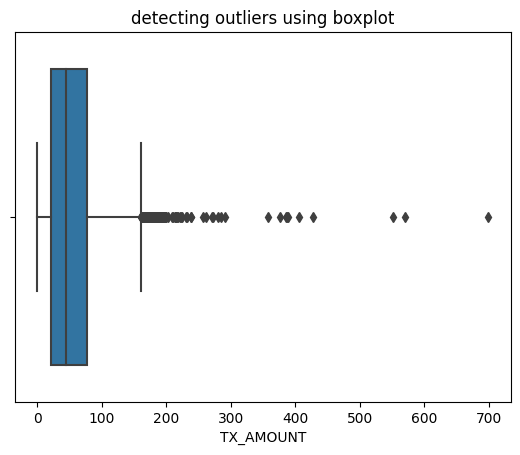

In [40]:
# detecting outliers using boxplot
plt.title('detecting outliers using boxplot')
sns.boxplot(x='TX_AMOUNT', data=df)
plt.show()

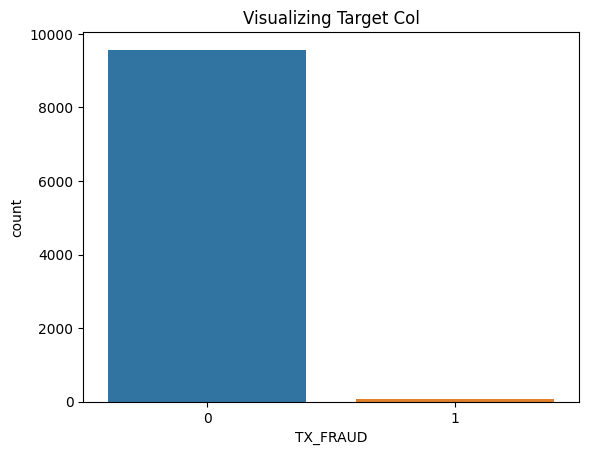

In [41]:
# plotting target col
plt.title('Visualizing Target Col')
sns.countplot(x='TX_FRAUD', data=df)
plt.show()

**Performing Feature Engineering**

In [42]:
df['TX_DATETIME'] = df['TX_DATETIME'].astype(str)

In [43]:
# feature engineering
df['DATE'] = df['TX_DATETIME'].str.split('/').str[0]
df['MONTH'] = df['TX_DATETIME'].str.split('/').str[1]
df['YEAR'] = df['TX_DATETIME'].str.split('/').str[2]

In [44]:
df.drop(['TRANSACTION_ID', 'YEAR', 'TX_DATETIME'], inplace=True, axis=1)

In [45]:
df.head()

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,DATE,MONTH
0,4423,7637,12.29,0,9,30
1,3680,5369,222.32,1,9,30
2,3255,1246,8.79,0,9,30
3,1353,8423,33.77,0,9,30
4,1231,1382,60.86,0,9,30


In [46]:
# assign independent variables 
x = df.drop(['TX_FRAUD'], axis=1)
# assign dependent variable
y = df['TX_FRAUD']

**Splitting Dataset into Train and Test**

In [47]:
# Split arrays or matrices into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [48]:
# checking the spread of data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6464, 5)
(3185, 5)
(6464,)
(3185,)


**Using Imblearn Library to Handle Data Imbalance present in the Dataset.**

Use the Synthetic Minority Oversampling Technique (SMOTE) which is a statistical technique for increasing the number of cases in your dataset in a balanced way. To data Imbalance present in the dataset.

none_fraud_transaction = 9569

fraud_transaction = 80

In [49]:
# outputing y value before over sampling.
counter = Counter(y_train)
print("Before Sampling: {}".format(counter))

# Over-sampling using SMOTE and cleaning using ENN.
sm = SMOTEENN()
# esample the dataset.
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# outputing y value after over sampling.
counter = Counter(y_train_sm)
print("After Sampling: {}".format(counter))

Before Sampling: Counter({0: 6409, 1: 55})
After Sampling: Counter({1: 5748, 0: 5260})


**Automatic Treatment of Outliers using LocalOutlierFactor**

The anomaly score of each sample is called the Local Outlier Factor.
It measures the local deviation of the density of a given sample with respect
to its neighbors..

In [50]:
# Unsupervised Outlier Detection using the Local Outlier Factor (LOF).
lof = LocalOutlierFactor()
# Returns -1 for outliers and 1 for inliers.
pred = lof.fit_predict(x_train_sm)

In [51]:
# select all rows that are not outliers
mask = pred != -1
x_train_sm, y_train_sm = x_train_sm[mask], y_train_sm[mask]
# summarize the shape of the updated training dataset
print(x_train_sm.shape, y_train_sm.shape)

(10510, 5) (10510,)


In [52]:
# Apply a power transform featurewise to make data more Gaussian-like.
sc = StandardScaler()
# fit on the training dataset
sc.fit(x_train_sm)

# scale the training datasets
x_train_sm = sc.transform(x_train_sm)
# scale the testing datasets                
x_test = sc.transform(x_test)                                                   

**Model Development**

TensorFlow is an open-sourced end-to-end platform, a library for multiple machine learning tasks, while Keras is a high-level neural network library that runs on top of TensorFlow

In [80]:
# kernel_regularizer=L1L2(l1=1e-3, l2=1e-2), bias_regularizer=L2(1e-4)
# building keras model
def build_model():
    # Sequential groups a linear stack of layers
    model = Sequential([
        Dense(64, activation="relu", input_shape=(5,)),
        Dropout(0.2),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ])
    return model

model = build_model()

In [54]:
# Prints a string summary of the network.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 140,545
Trainable params: 140,545
Non-trai

In [81]:
# Configures the model for training.
model.compile(
    # Gradient descent (with momentum) optimizer.
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    # Computes the cross-entropy loss between true labels and predicted labels.
    loss=BinaryCrossentropy(),
    # Calculates how often predictions match binary labels.
    metrics=[BinaryAccuracy()])

In [82]:
# model improving.
call_back = [
    # Callback to save the Keras model or model weights at some frequency.
    ModelCheckpoint(filepath="./", monitor="val_loss", save_best_only=True, save_weights_only=True, mode="max"),
    # TensorBoard is a visualization tool provided with TensorFlow.
    TensorBoard(log_dir='./logs', update_freq=1),
    # Stop training when a monitored metric has stopped improving.
    EarlyStopping(monitor='val_loss', patience=20, mode='min', restore_best_weights=True)
]

In [83]:
# Set the given experiment as the active experiment. 
mlflow.set_experiment("Customer Churn Prediction")

# Start a new MLflow run
with mlflow.start_run(): 
    # Enables automatic logging
    autolog()
    
    # Trains the model for a fixed number of epochs (iterations on a dataset).
    history = model.fit(x_train_sm, y_train_sm, batch_size=64, epochs=50, callbacks=call_back, validation_data=(x_test, y_test))
    
    # Saves a model as a TensorFlow SavedModel or HDF5 file.
    save_model(model, filepath="model.h5")
    
    # Loads a model saved
    loaded_model = load_model(filepath="model.h5")

    # Generates output predictions for the x_test input sample.
    pred = loaded_model.predict(x_test)
    
    # Returns the loss value & metrics values for the model in test mode.
    _, acc = loaded_model.evaluate(x_train_sm, y_train_sm, batch_size=128, verbose=0)
    print("Train Accuracy: {:.2f}".format(acc*100))

    # Returns the loss value & metrics values for the model in test mode.
    _, acc = loaded_model.evaluate(x_test, y_test, batch_size=128, verbose=0)
    print("Test Accuracy: {:.2f}".format(acc*100))
    
    metric = {
        "Training Accuracy": acc,
        "Testing Accuracy": acc
    }
    # Log multiple metrics for the current run
    log_metrics(metric)
    
# End an active MLflow run
mlflow.end_run()

Epoch 1/50
165/165 [==============================] - 31s 73ms/step - loss: 0.6940 - binary_accuracy: 0.5101 - val_loss: 0.7150 - val_binary_accuracy: 0.1086
Epoch 2/50
165/165 [==============================] - 6s 38ms/step - loss: 0.6810 - binary_accuracy: 0.5576 - val_loss: 0.7256 - val_binary_accuracy: 0.1278
Epoch 3/50
165/165 [==============================] - 5s 29ms/step - loss: 0.6675 - binary_accuracy: 0.5637 - val_loss: 0.7096 - val_binary_accuracy: 0.3881
Epoch 4/50
165/165 [==============================] - 4s 24ms/step - loss: 0.6451 - binary_accuracy: 0.6172 - val_loss: 0.6717 - val_binary_accuracy: 0.6882
Epoch 5/50
165/165 [==============================] - 3s 18ms/step - loss: 0.6144 - binary_accuracy: 0.6487 - val_loss: 0.6213 - val_binary_accuracy: 0.7934
Epoch 6/50
165/165 [==============================] - 3s 20ms/step - loss: 0.5891 - binary_accuracy: 0.6601 - val_loss: 0.5774 - val_binary_accuracy: 0.8204
Epoch 7/50
165/165 [==============================] - 3s 

100/100 [==============================] - 1s 5ms/step
Train Accuracy: 79.87
Test Accuracy: 67.19


In [84]:
y_hat = [1 if i > 0.5 else 0 for i in pred]

In [85]:
# Build a text report showing the main classification metrics.
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      3160
           1       0.01      0.56      0.03        25

    accuracy                           0.67      3185
   macro avg       0.50      0.62      0.41      3185
weighted avg       0.99      0.67      0.80      3185



In [86]:
# Compute confusion matrix to evaluate the accuracy of a classification.
con_matrix = pd.DataFrame(confusion_matrix(y_test, y_hat), 
                          index=["Actual: No", "Actual: Yes"],
                          columns=("Predicted: No", "Predicted: Yes"))
print(con_matrix)

             Predicted: No  Predicted: Yes
Actual: No            2126            1034
Actual: Yes             11              14


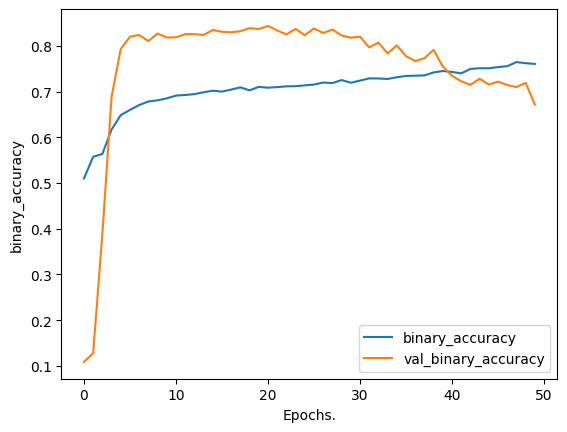

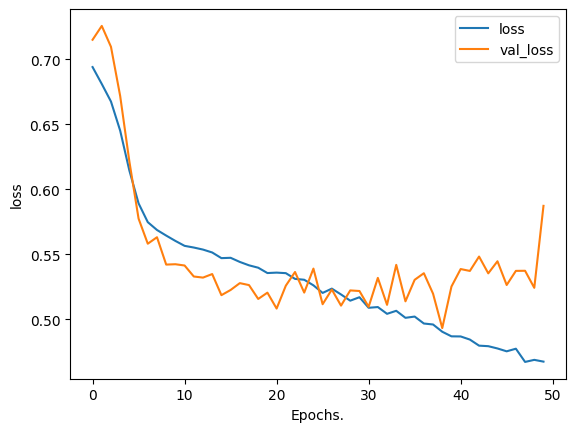

In [87]:
# plotting model peformance
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs.")
    plt.ylabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

# Model Accuracy Performance 
plot_graph(history, "binary_accuracy")
# Model Validation Performance
plot_graph(history, "loss")

**Using PyGad for Optimization.**

1. Instantiate KerasGA
2. Define fitness function
3. Create Callback function
4. Plot the result
5. Measure the Loss and Accuracy

In [88]:
# Creates an instance of the KerasGA class to build a population of model parameters.
keras_ga = KerasGA(model=model,
                   num_solutions=50)

In [89]:
# assign x_train to data_input
data_input = x_train_sm
# assign y_train to data_output
data_output = y_train_sm

In [90]:
# creating fitness function.
def fitness_func(solution, solution_idx):
    global data_input, data_output, keras_ga, model
    
    # set keras model to matrix
    model_weight_matrix = model_weights_as_matrix(model=model, weights_vector=solution)
    
    # sets the weights of the layer, from NumPy arrays.
    model.set_weights(weights=model_weight_matrix)
    
    # Generates output predictions for the input samples
    prediction = predict(model=model, 
                         solution=solution, 
                         data=data_input)
    
    # Computes the cross-entropy loss between true labels and predicted labels.
    criterion = BinaryCrossentropy()
    
    solution_fitness = 1.0 / (criterion(data_output, prediction).numpy() + 0.00000001)
    return solution_fitness

In [91]:
# creating callback on_generation function
def on_generation(ga_instance):
    # Convert a number or string to an integer.
    print("Generation: {generation}".format(generation=ga_instance.generations_completed), end='\n')
    # Returns information about the best solution found by the genetic algorithm.
    print("Fitness: {fitness}".format(fitness=ga_instance.best_solution()[1]))

In [92]:
# Initial population of network weights.
initial_pol = keras_ga.population_weights

In [93]:
# Instantiate GA class
ga_instance = GA(num_generations=10,
                 num_parents_mating=4, 
                 initial_population=initial_pol,
                 fitness_func=fitness_func,
                 on_generation=on_generation,
                 parent_selection_type="sss",
                 keep_parents=1,
                 crossover_type="single_point",
                 mutation_type="random",
                 mutation_percent_genes=10,)

In [94]:
# Runs the genetic algorithm.
ga_instance.run()

329/329 [==============================] - 2s 6ms/step
Generation: 1
329/329 [==============================] - 2s 6ms/step
Fitness: 0.7842097639207681
329/329 [==============================] - 2s 7ms/step
Generation: 2
329/329 [==============================] - 2s 7ms/step
Fitness: 0.7842097639207681
329/329 [==============================] - 2s 6ms/step
Generation: 3
329/329 [==============================] - 2s 7ms/step


329/329 [==============================] - 2s 7ms/step
Fitness: 0.7842097639207681
329/329 [==============================] - 2s 7ms/step
Generation: 4
329/329 [==============================] - 2s 6ms/step
Fitness: 0.7842097639207681
329/329 [==============================] - 2s 6ms/step
Generation: 5
329/329 [==============================] - 2s 6ms/step
Fitness: 0.7842097639207681
329/329 [==============================] - 2s 6ms/step
Generation: 6
329/329 [==============================] - 2s 6ms/step


329/329 [==============================] - 2s 6ms/step
Fitness: 0.7842097639207681
329/329 [==============================] - 2s 7ms/step
Generation: 7
329/329 [==============================] - 2s 6ms/step
Fitness: 0.7842097639207681
329/329 [==============================] - 3s 8ms/step
Generation: 8
329/329 [==============================] - 2s 5ms/step
Fitness: 0.7842097639207681
329/329 [==============================] - 2s 6ms/step
Generation: 9
329/329 [==============================] - 2s 6ms/step


329/329 [==============================] - 2s 6ms/step
Fitness: 0.7842097639207681
329/329 [==============================] - 2s 6ms/step
Generation: 10
329/329 [==============================] - 2s 6ms/step
Fitness: 0.7842097639207681


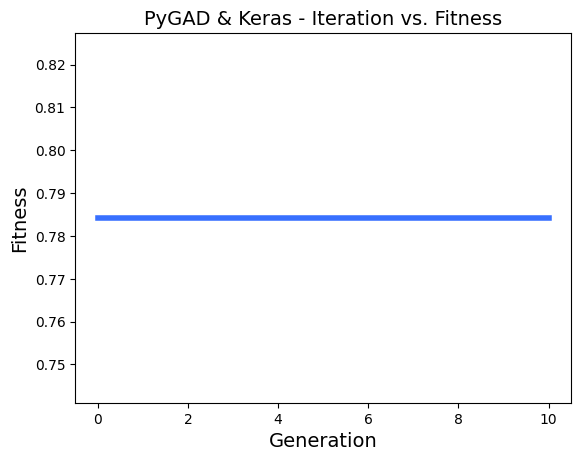

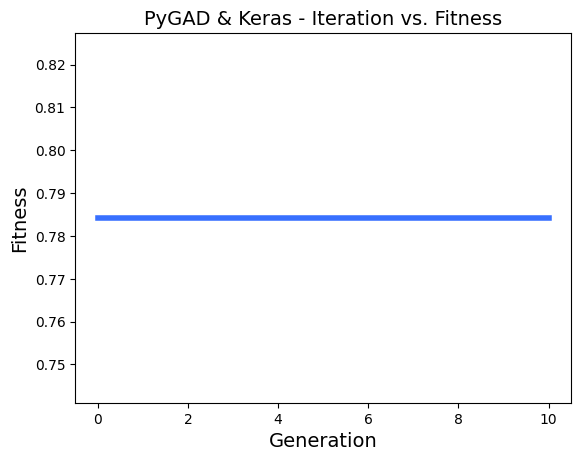

In [95]:
# Creates, shows, and returns a figure that summarizes how the fitness value evolved by generation
ga_instance.plot_fitness(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

In [96]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

329/329 [==============================] - 1s 4ms/step
Fitness value of the best solution = 0.7842097639207681
Index of the best solution : 0


In [97]:
# Make prediction based on the best solution.
predictions = predict(model=model,
                      solution=solution,
                      data=data_input)

print("Predictions : \n", predictions)

329/329 [==============================] - 1s 4ms/step
Predictions : 
 [[0.39845833]
 [0.1300124 ]
 [0.04297306]
 ...
 [0.5501777 ]
 [0.5224225 ]
 [0.75785166]]


In [98]:
# calculate the binary crossentropy for the trained model
bce = BinaryCrossentropy()
print("BinaryCrossentropy: {:.3f}".format(bce(data_output, predictions).numpy()))

# calculate the binary accuracy on the trained model
ba = BinaryAccuracy()
ba.update_state(data_output, predictions)
accuracy = ba.result().numpy()
print("Binary Accuracy: {:.3f}".format(accuracy))

BinaryCrossentropy: 1.275
Binary Accuracy: 0.799
